In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.neighbors import NearestNeighbors
from sklearn.pipeline import Pipeline

In [3]:
csv_file = pd.read_csv('D:\\Retail Recommendation\\Amazon-Products.csv')
csv_file.head()

,Unnamed: 0,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
0,0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/31UISB90sY...,https://www.amazon.in/Lloyd-Inverter-Convertib...,4.2,"2,255","₹32,999","₹58,990"
1,1,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.2,"2,948","₹46,490","₹75,990"
2,2,LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Inverter-Convertible-...,4.2,"1,206","₹34,490","₹61,990"
3,3,LG 1.5 Ton 3 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.0,69,"₹37,990","₹68,990"
4,4,Carrier 1.5 Ton 3 Star Inverter Split AC (Copp...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/41lrtqXPiW...,https://www.amazon.in/Carrier-Inverter-Split-C...,4.1,630,"₹34,490","₹67,790"


In [4]:
csv_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551585 entries, 0 to 551584
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Unnamed: 0      551585 non-null  int64 
 1   name            551585 non-null  object
 2   main_category   551585 non-null  object
 3   sub_category    551585 non-null  object
 4   image           551585 non-null  object
 5   link            551585 non-null  object
 6   ratings         375791 non-null  object
 7   no_of_ratings   375791 non-null  object
 8   discount_price  490422 non-null  object
 9   actual_price    533772 non-null  object
dtypes: int64(1), object(9)
memory usage: 42.1+ MB


In [5]:
csv_file.isnull().sum()

Unnamed: 0             0
name                   0
main_category          0
sub_category           0
image                  0
link                   0
ratings           175794
no_of_ratings     175794
discount_price     61163
actual_price       17813
dtype: int64

In [6]:
csv_file.columns

Index(['Unnamed: 0', 'name', 'main_category', 'sub_category', 'image', 'link',
       'ratings', 'no_of_ratings', 'discount_price', 'actual_price'],
      dtype='object')

In [7]:
csv_file["discount_price"] = csv_file["discount_price"].astype(str).str.replace('₹', '').str.replace(',', '').astype(float)
csv_file["actual_price"] = csv_file["actual_price"].astype(str).str.replace('₹', '').str.replace(',', '').astype(float)

In [8]:
csv_file["ratings"] = csv_file["ratings"].replace(['Get', 'FREE', '₹68.99', '₹65', '₹70', '₹100', '₹99', '₹2.99'], '0.0').astype(float)

In [9]:
csv_file.describe()

,Unnamed: 0,ratings,discount_price,actual_price
count,551585.000000,375791.000000,4.904220e+05,5.337720e+05
mean,7006.200471,3.768747,2.623161e+03,2.311128e+04
std,5740.835523,0.895413,9.458196e+03,1.355082e+07
min,0.000000,0.000000,8.000000e+00,0.000000e+00
25%,1550.000000,3.500000,3.890000e+02,9.900000e+02
50%,5933.000000,3.900000,6.790000e+02,1.599000e+03
75%,11482.000000,4.200000,1.399000e+03,2.999000e+03
max,19199.000000,5.000000,1.249990e+06,9.900000e+09


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

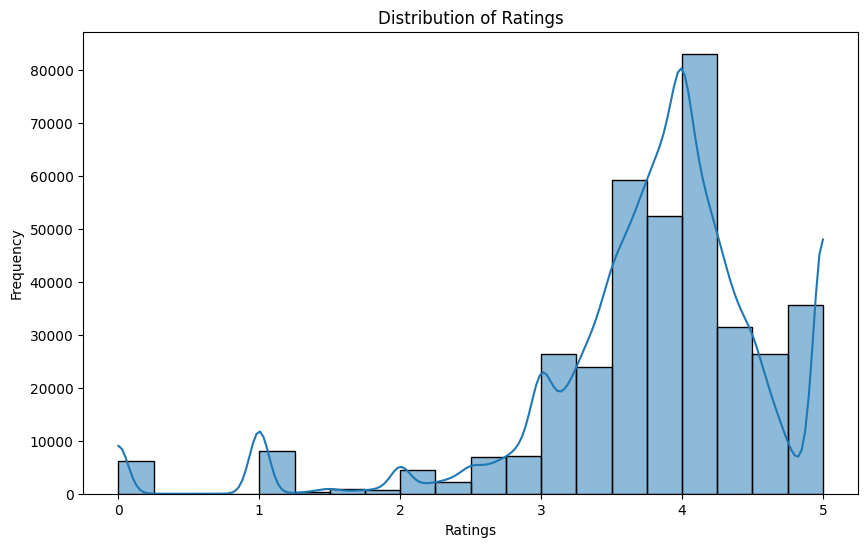

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(csv_file['ratings'].dropna(), bins=20, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.show()


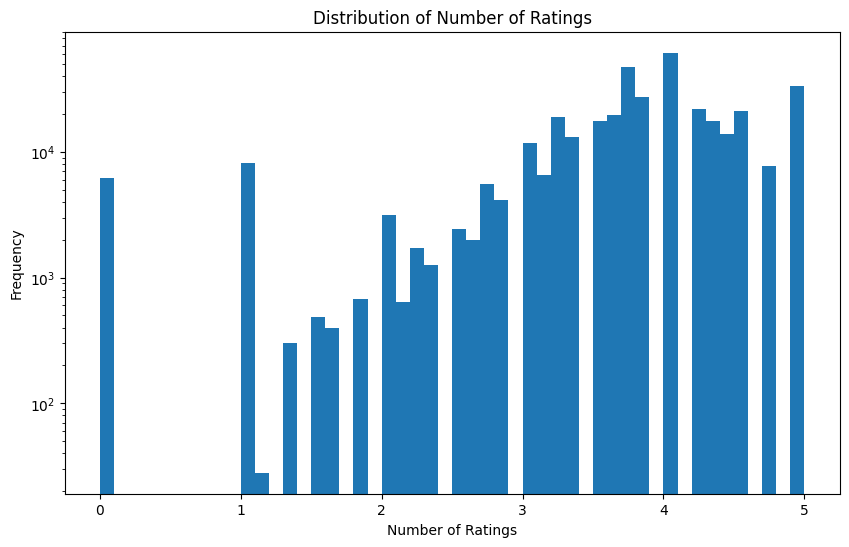

In [12]:
plt.figure(figsize=(10, 6))
plt.hist(csv_file["ratings"], bins=50, log=True)
plt.xlabel('Number of Ratings')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Ratings')
plt.show()

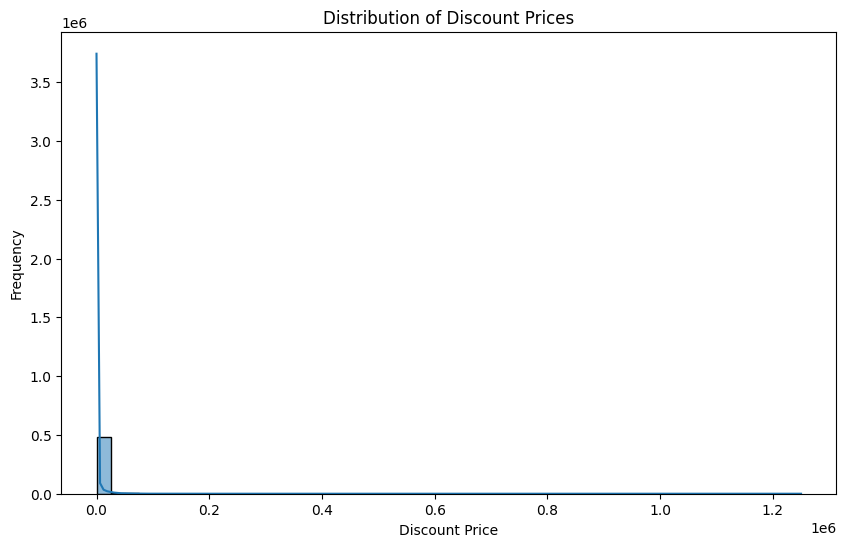

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(csv_file['discount_price'], bins=50, kde=True)
plt.title('Distribution of Discount Prices')
plt.xlabel('Discount Price')
plt.ylabel('Frequency')
plt.show()

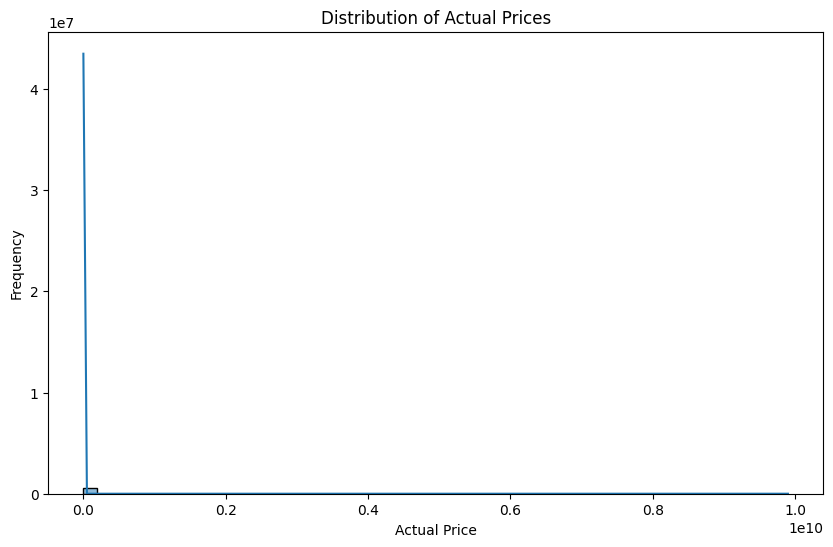

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(csv_file['actual_price'], bins=50, kde=True)
plt.title('Distribution of Actual Prices')
plt.xlabel('Actual Price')
plt.ylabel('Frequency')
plt.show()

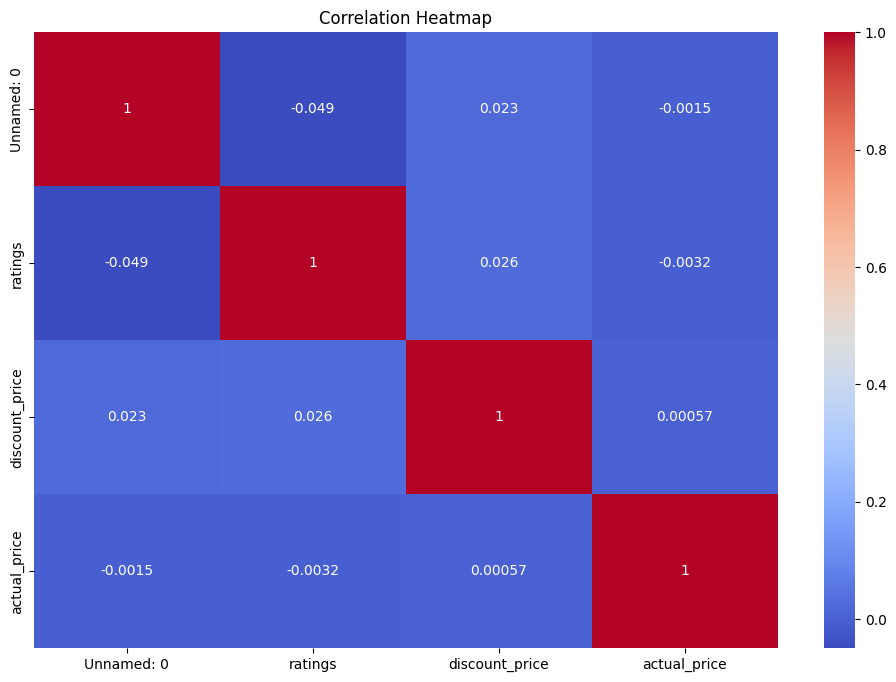

In [15]:
numeric_cols = csv_file.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(12, 8))
sns.heatmap(csv_file[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


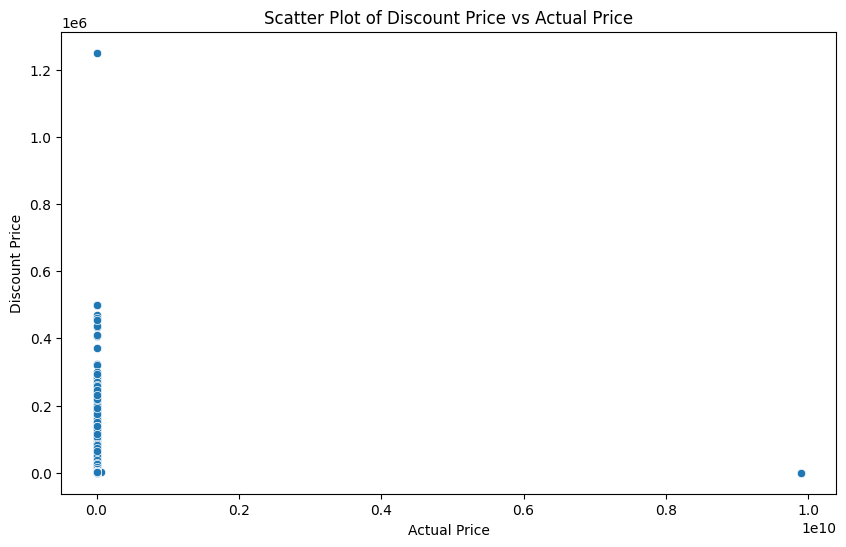

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='actual_price', y='discount_price', data=csv_file)
plt.title('Scatter Plot of Discount Price vs Actual Price')
plt.xlabel('Actual Price')
plt.ylabel('Discount Price')
plt.show()

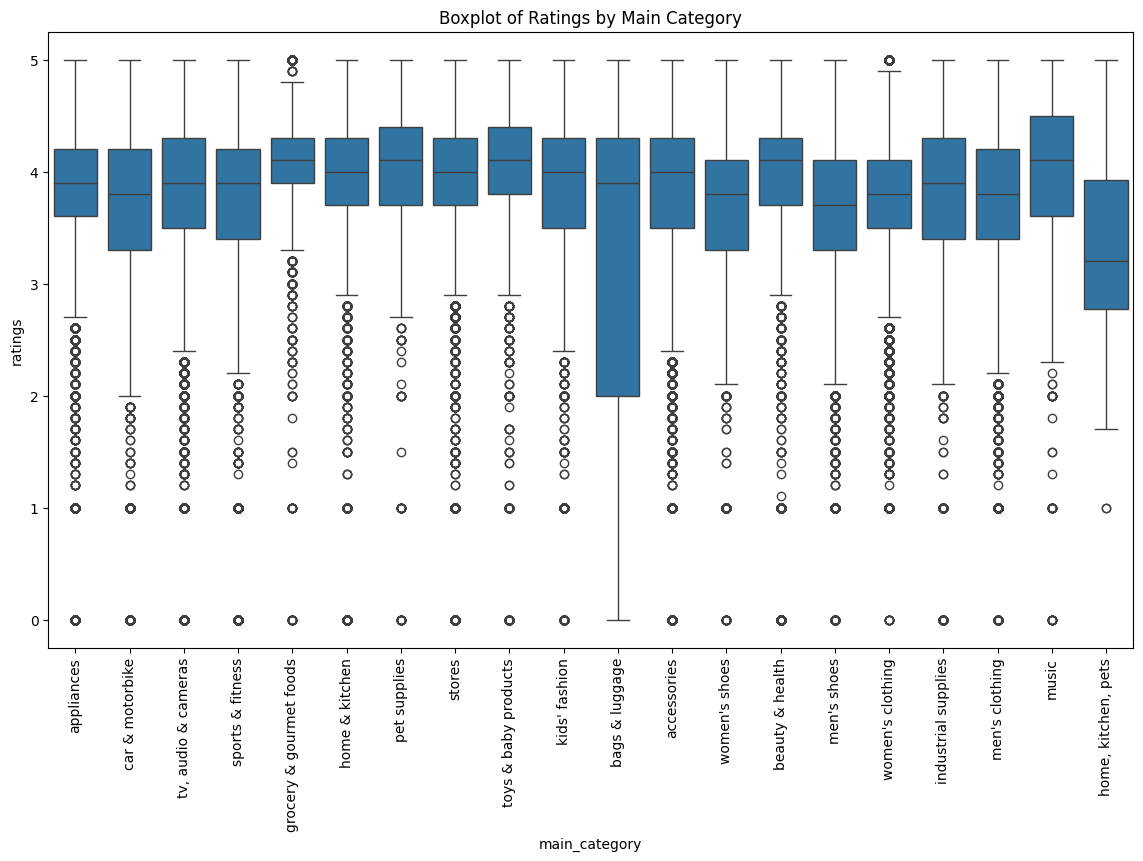

In [17]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='main_category', y='ratings', data=csv_file)
plt.xticks(rotation=90)
plt.title('Boxplot of Ratings by Main Category')
plt.show()

In [18]:
features = csv_file[['discount_price', 'actual_price', 'ratings']]

In [19]:
knn_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('knn', NearestNeighbors(n_neighbors=5, metric='euclidean'))
])

In [20]:
knn_pipeline.fit(features)

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler()),
                ('knn', NearestNeighbors(metric='euclidean'))])

In [21]:
def get_recommendations(item_index, n_recommendations=5):
    item_features = features.iloc[item_index].values.reshape(1, -1)
    distances, indices = knn_pipeline.named_steps['knn'].kneighbors(item_features, n_neighbors=n_recommendations+1)
    
    recommended_indices = indices[0][1:]
    
    recommendations = csv_file.iloc[recommended_indices][['discount_price', 'actual_price', 'ratings']]
    return recommendations

In [22]:
item_index = 5 
recommendations = get_recommendations(item_index)
print(f"Recommendations for item at index {item_index}:")
print(recommendations)

Recommendations for item at index 5:
        discount_price  actual_price  ratings
498818       1249990.0     1594900.0      4.0
310622        499999.0     1000000.0      NaN
149498        499999.0     1000000.0      NaN
197464        468012.0      550602.0      NaN
310760        459999.0      920000.0      NaN


In [23]:
import pickle

In [24]:
with open('knn_model.pkl', 'wb') as f:
    pickle.dump(knn_pipeline, f)
